In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1qJtMtG7BPanCSDXYhJexmAmVwDl0CC8W'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('days.csv') 

In [0]:
import pandas as pd
import numpy as np

In [4]:
bike = pd.read_csv('days.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [0]:
link = 'https://drive.google.com/open?id=1IPmUW82yNmSDcp8wyREpt9ka7tiixi-8'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('transcoding_measurement.tsv') 

In [6]:
coding = pd.read_csv('transcoding_measurement.tsv',sep='\t')
coding.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,1564,64483,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


# Question 1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


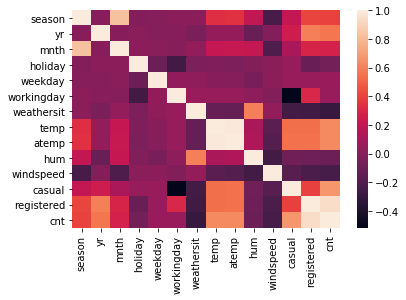

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature space by dropping useless feature
bike_to_drop = ['instant','dteday']
bike_modified = bike.drop(bike_to_drop, axis=1)
bike_corr = bike_modified.corr(method='pearson')
# show heapmap of correlations
sns.heatmap(bike_corr)
bike_corr

For the bike sharing dataset, the target variables are: 'casual', 'registered', 'cnt'. We can see that for the target 'casual', feature 'cnt' has the highest absolute correlation; for the target 'registered', feature 'cnt' has the highest absolute correlation; for the target 'cnt', feature 'registered' has the highest absolute correlation.

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
duration,1.000000,0.072634,0.050446,0.004759,-0.030559,0.773659,0.850175,0.061523,0.851053,0.426600,0.406651,0.416951,0.000149,0.000698,0.000377,0.000577,0.009282,0.005533
width,0.072634,1.000000,0.990467,0.815328,0.396052,0.077829,0.238482,-0.063823,0.235592,0.601446,0.560013,0.575222,-0.001025,-0.000245,-0.000088,-0.000061,0.035109,0.129861
height,0.050446,0.990467,1.000000,0.799082,0.456310,0.093377,0.234470,-0.069076,0.231766,0.592107,0.534646,0.550593,-0.001004,-0.000204,-0.000028,-0.000012,0.041452,0.128479
bitrate,0.004759,0.815328,0.799082,1.000000,0.255464,0.059262,0.112427,-0.045938,0.111137,0.446320,0.616313,0.615846,-0.001328,-0.000284,-0.000096,-0.000088,0.043142,0.155200
framerate,-0.030559,0.396052,0.456310,0.255464,1.000000,0.263127,0.332138,0.026759,0.331983,0.306534,0.196526,0.209523,-0.001684,0.000189,0.000102,0.000100,0.059686,0.079336
i,0.773659,0.077829,0.093377,0.059262,0.263127,1.000000,0.831221,0.122470,0.836373,0.537019,0.393288,0.413247,-0.000739,0.000139,0.001220,0.001239,0.034206,0.018489
p,0.850175,0.238482,0.234470,0.112427,0.332138,0.831221,1.000000,0.065422,0.999844,0.665995,0.605745,0.623506,-0.001788,0.000240,0.000393,0.000482,0.031283,0.033201
b,0.061523,-0.063823,-0.069076,-0.045938,0.026759,0.122470,0.065422,1.000000,0.081321,-0.030969,-0.026488,-0.026406,0.002408,0.000263,0.000804,0.000835,0.006029,0.005140
frames,0.851053,0.235592,0.231766,0.111137,0.331983,0.836373,0.999844,0.081321,1.000000,0.664543,0.603138,0.620952,-0.001740,0.000243,0.000417,0.000505,0.031451,0.033115
i_size,0.426600,0.601446,0.592107,0.446320,0.306534,0.537019,0.665995,-0.030969,0.664543,1.000000,0.713713,0.751780,-0.002398,-0.000285,0.000226,0.000182,0.035931,0.064711


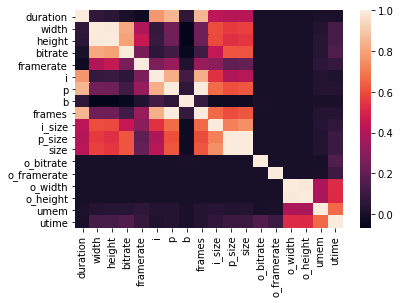

In [8]:
# Get feature space by dropping useless feature
coding_to_drop = ['id','codec','o_codec','b_size']
coding_modified = coding.drop(coding_to_drop, axis=1)
coding_corr = coding_modified.corr(method='pearson')
# show heapmap of correlations
sns.heatmap(coding_corr)
coding_corr

For the video dataset, the target variable is: 'utime'. We can see that feature 'umem' has the highest absolute correlation. 

# Question 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


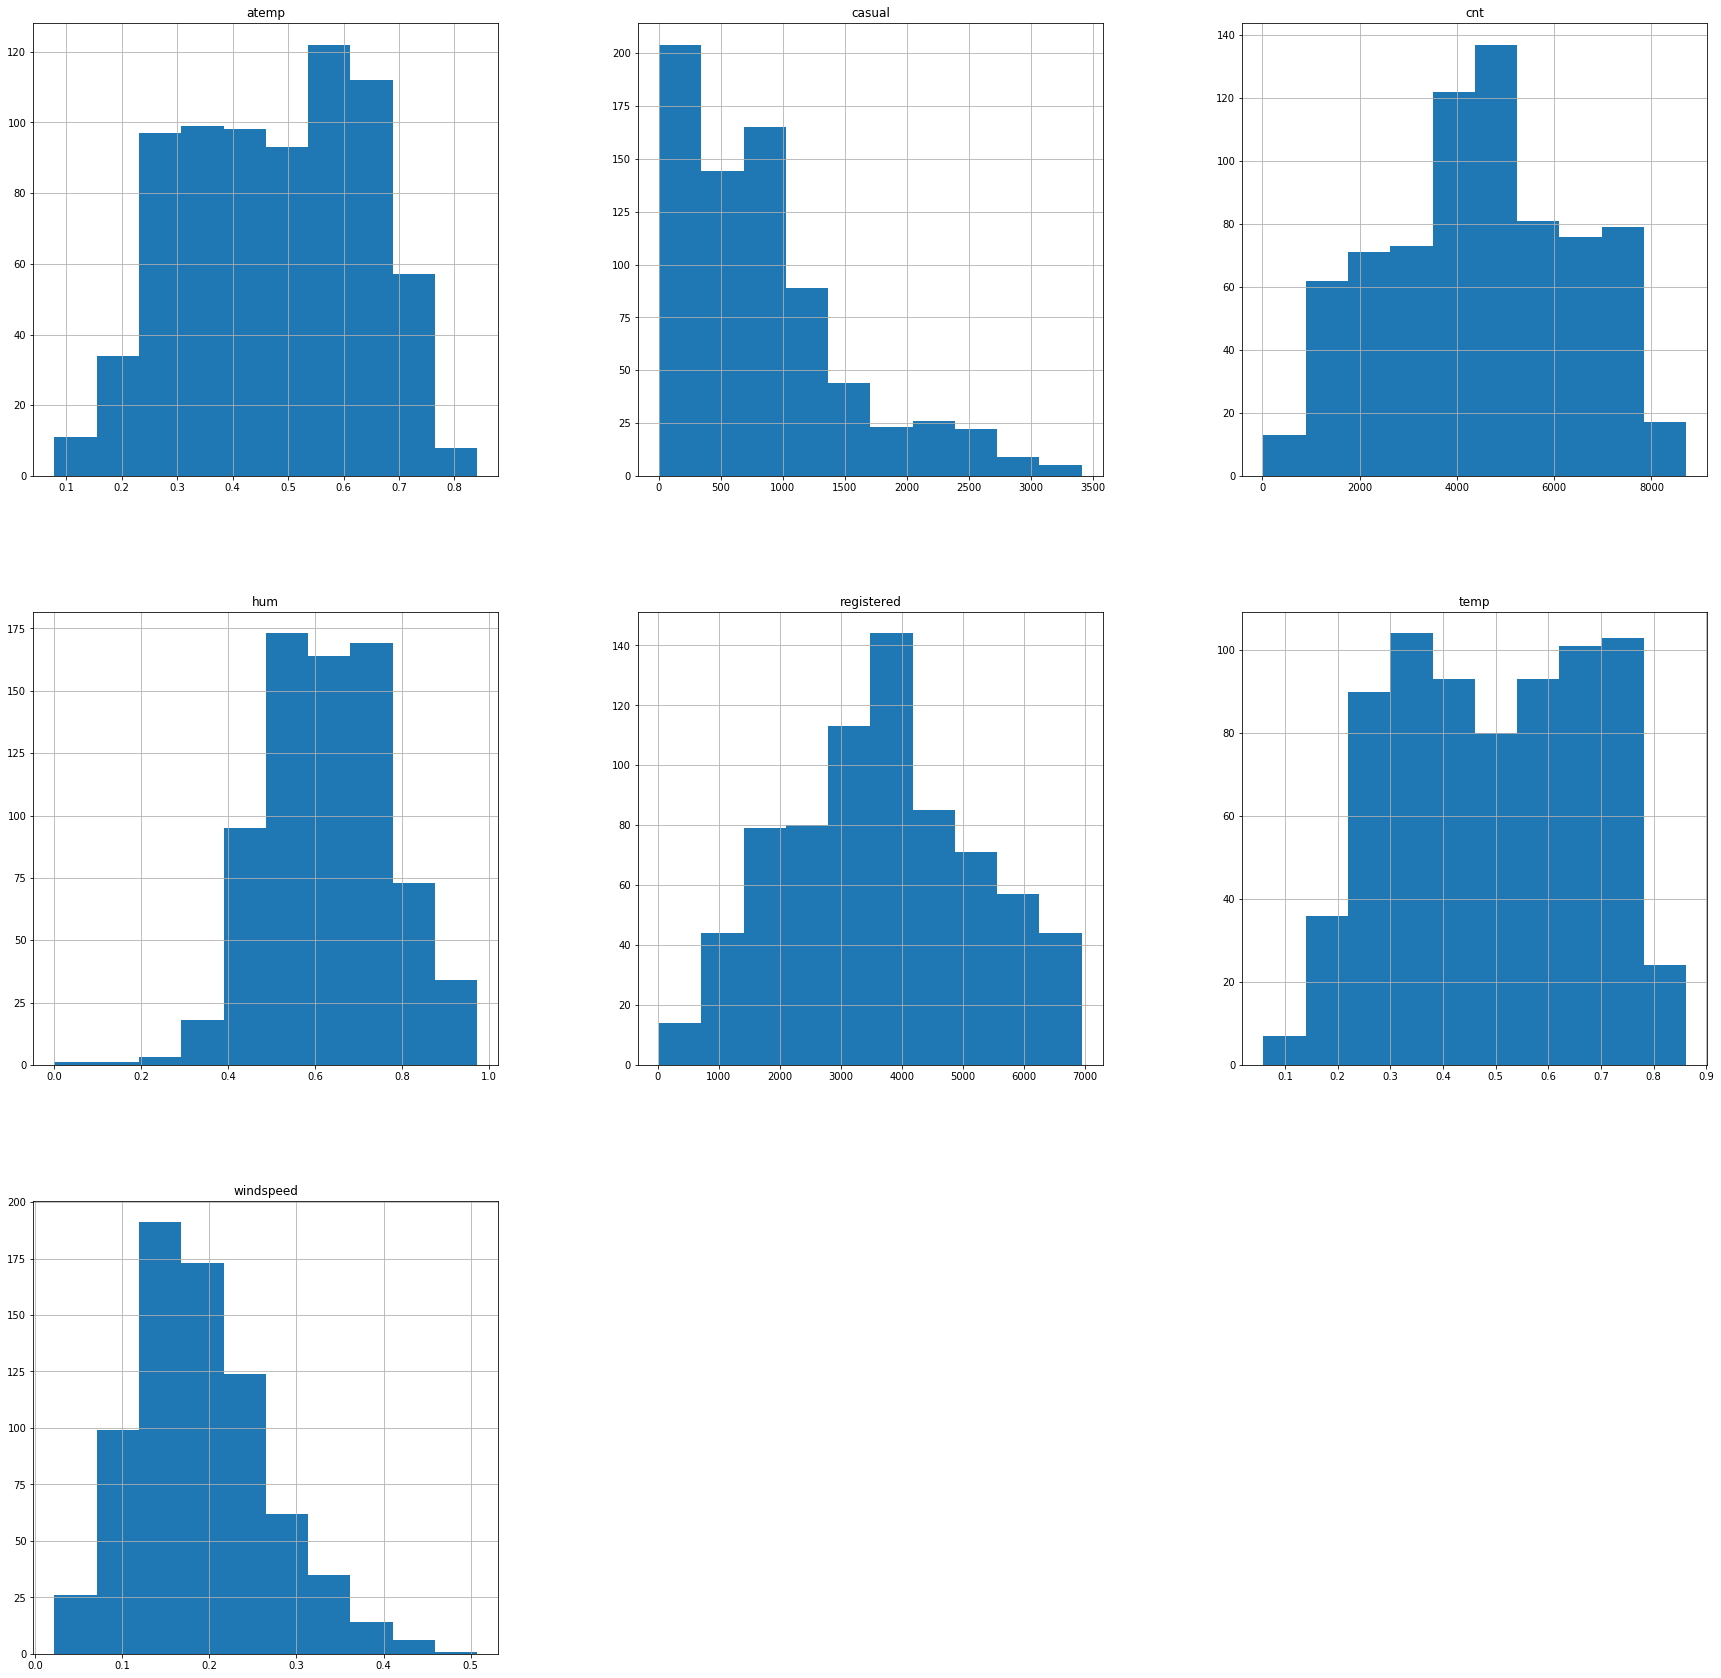

In [9]:
bike_to_drop_2 = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
bike_modified_2 = bike_modified.drop(bike_to_drop_2, axis=1)
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
bike_modified_2.hist(ax=ax)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


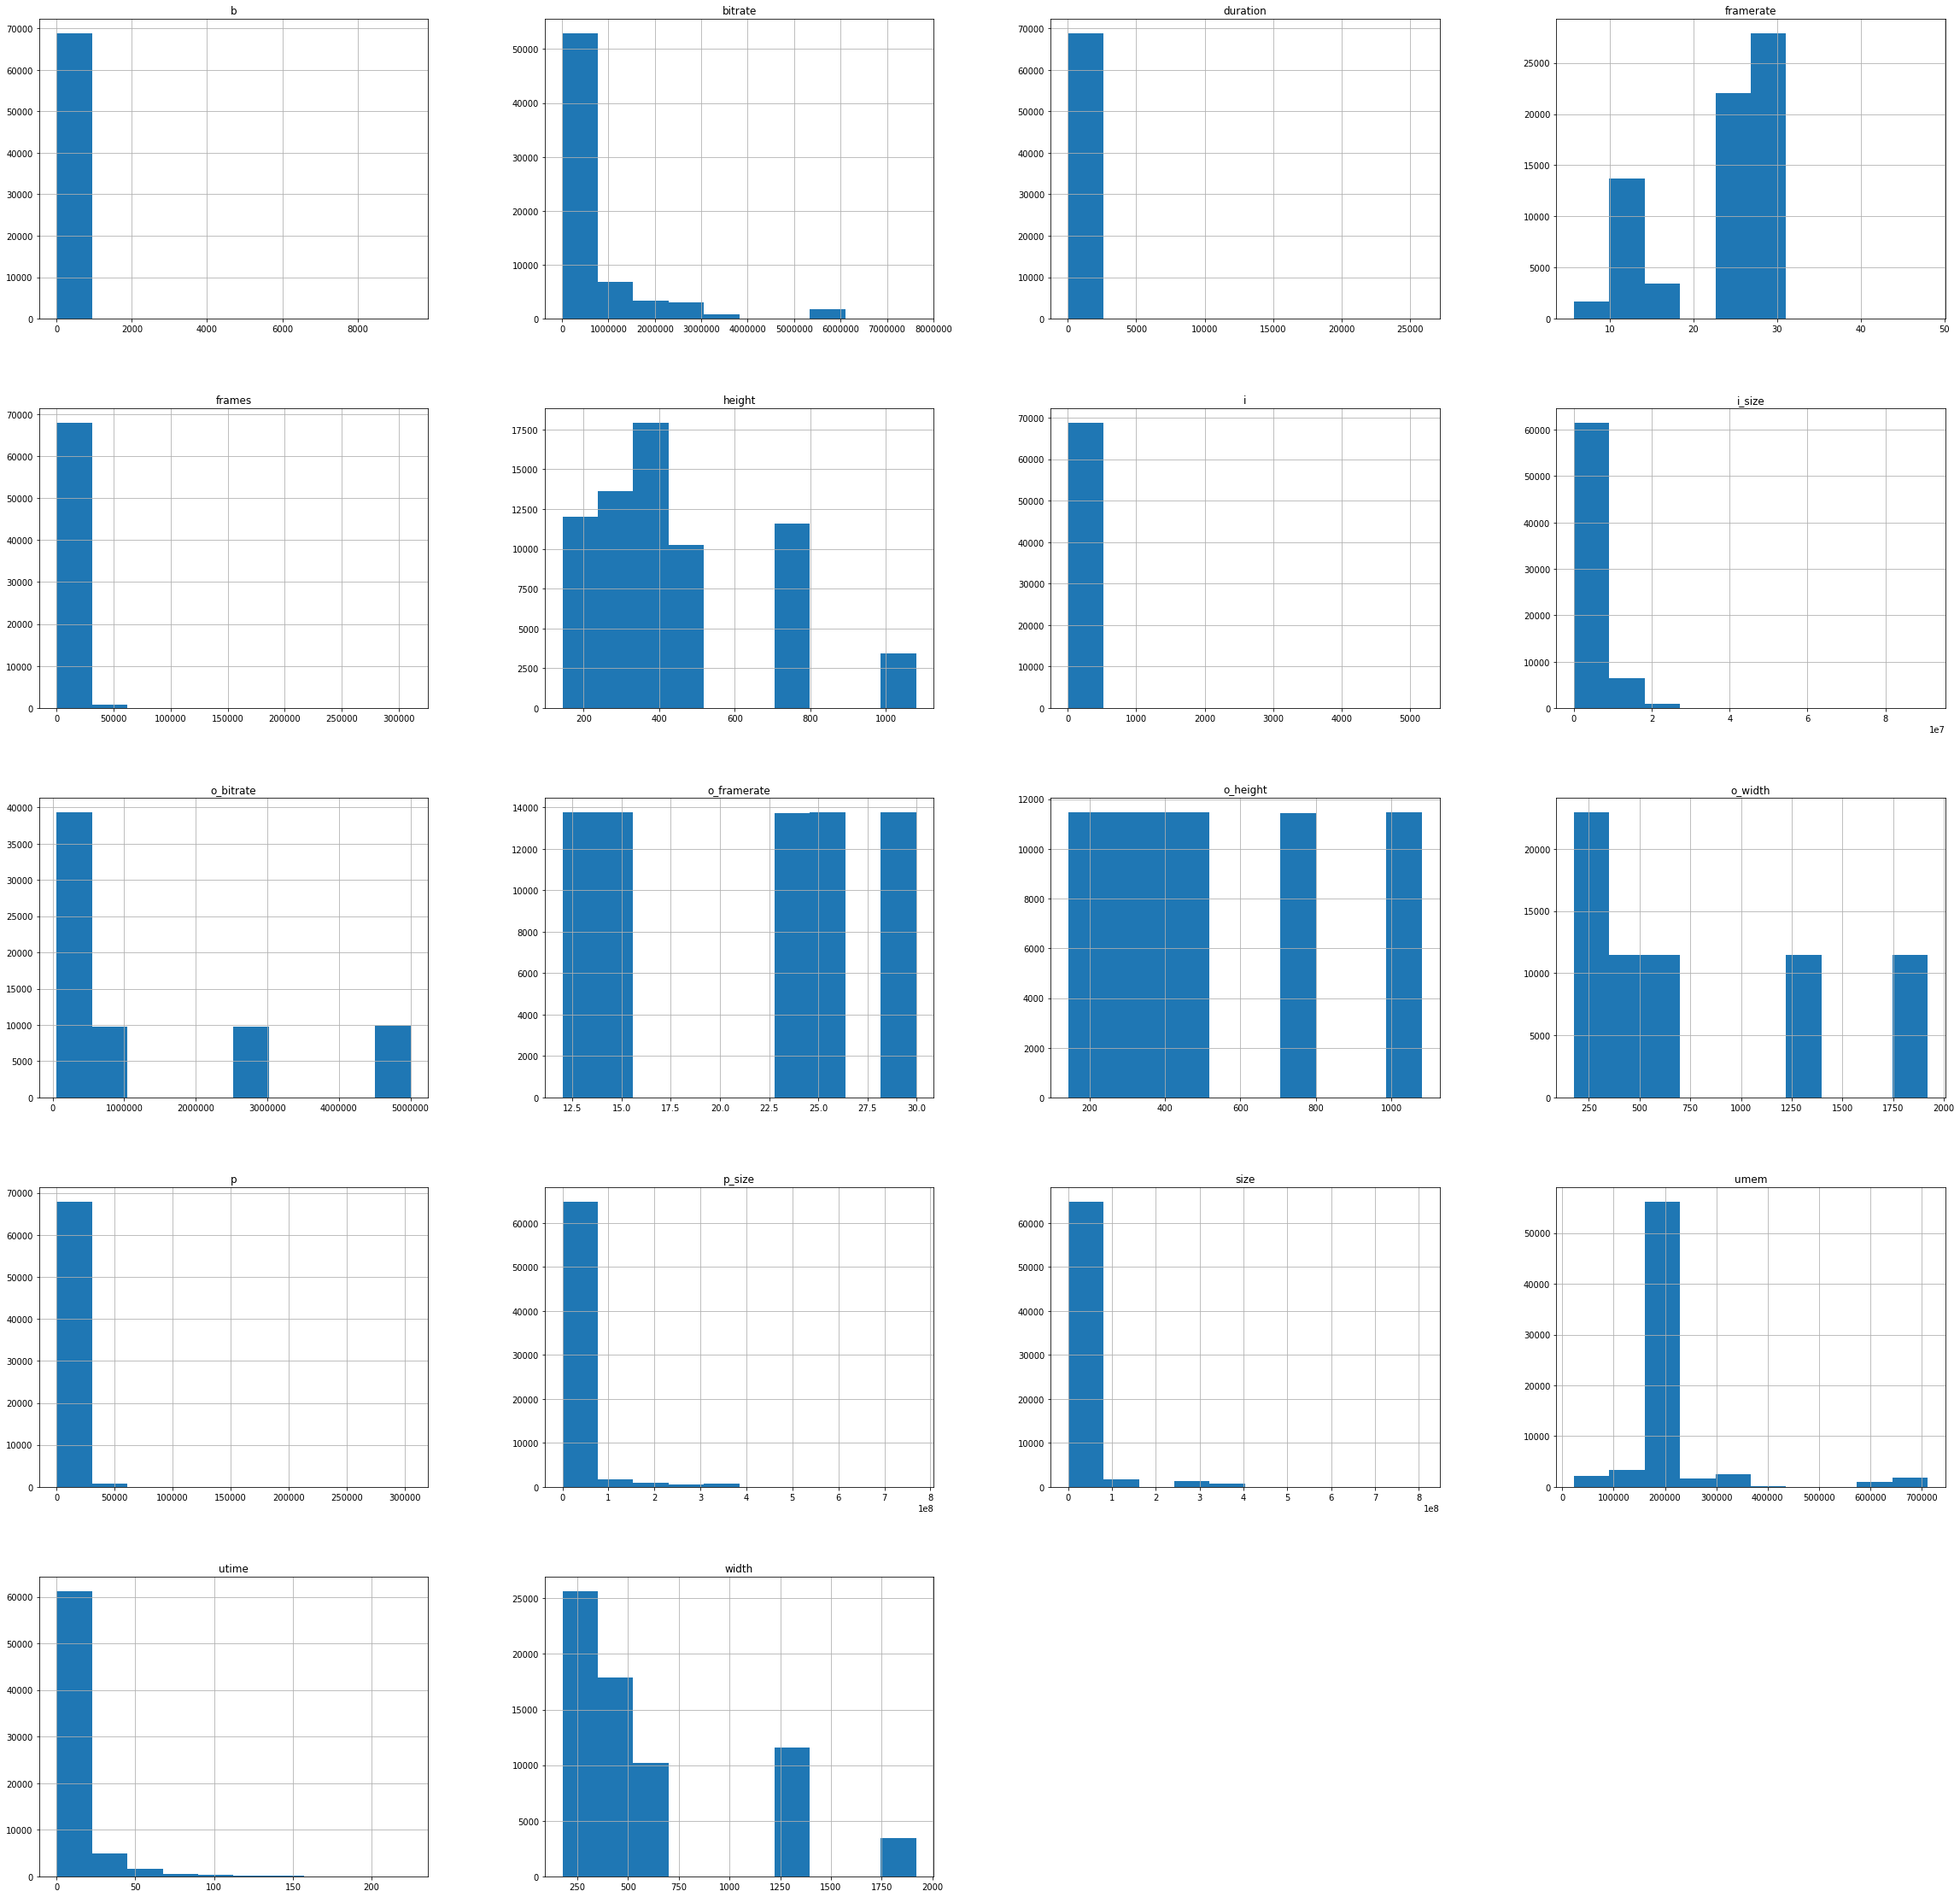

In [10]:
fig = plt.figure(figsize = (40,40))
ax = fig.gca()
coding_modified.hist(ax=ax)
plt.show()

# Question 3

For bike dataset, categorical features are 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'



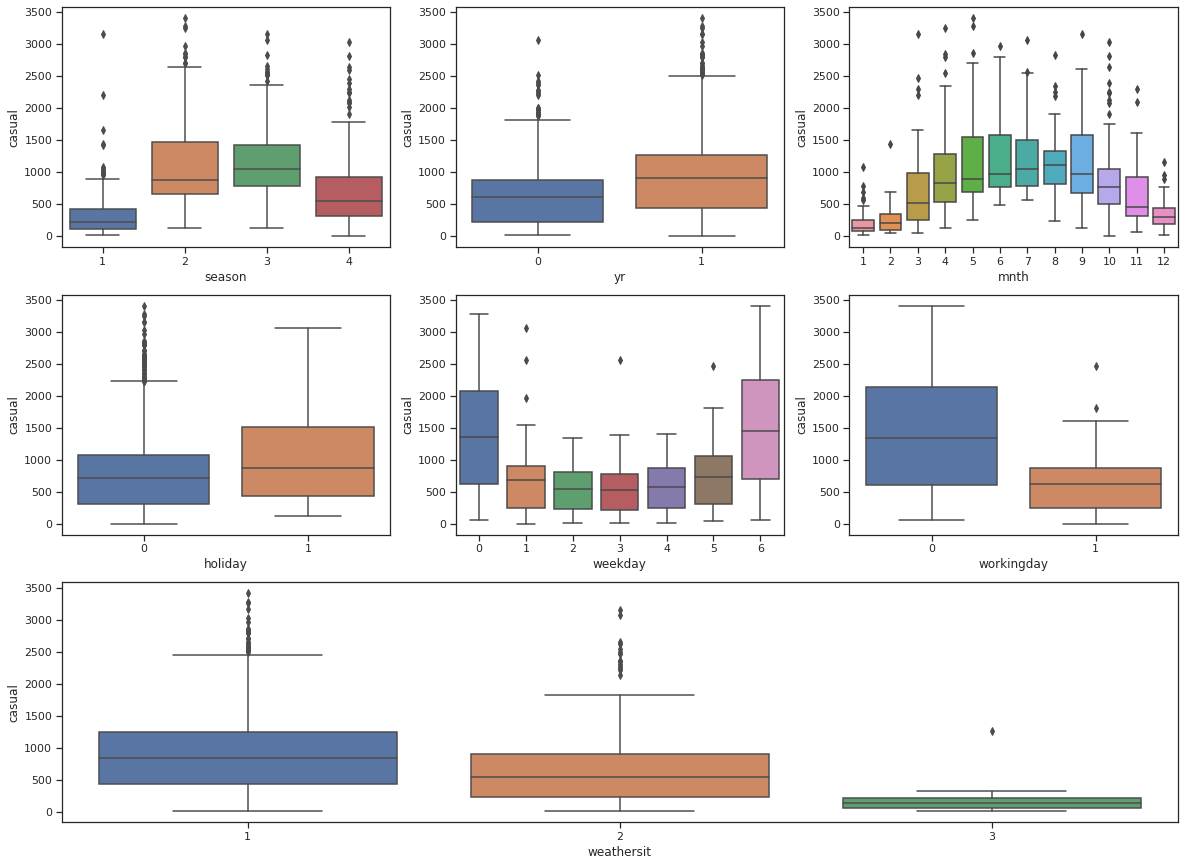

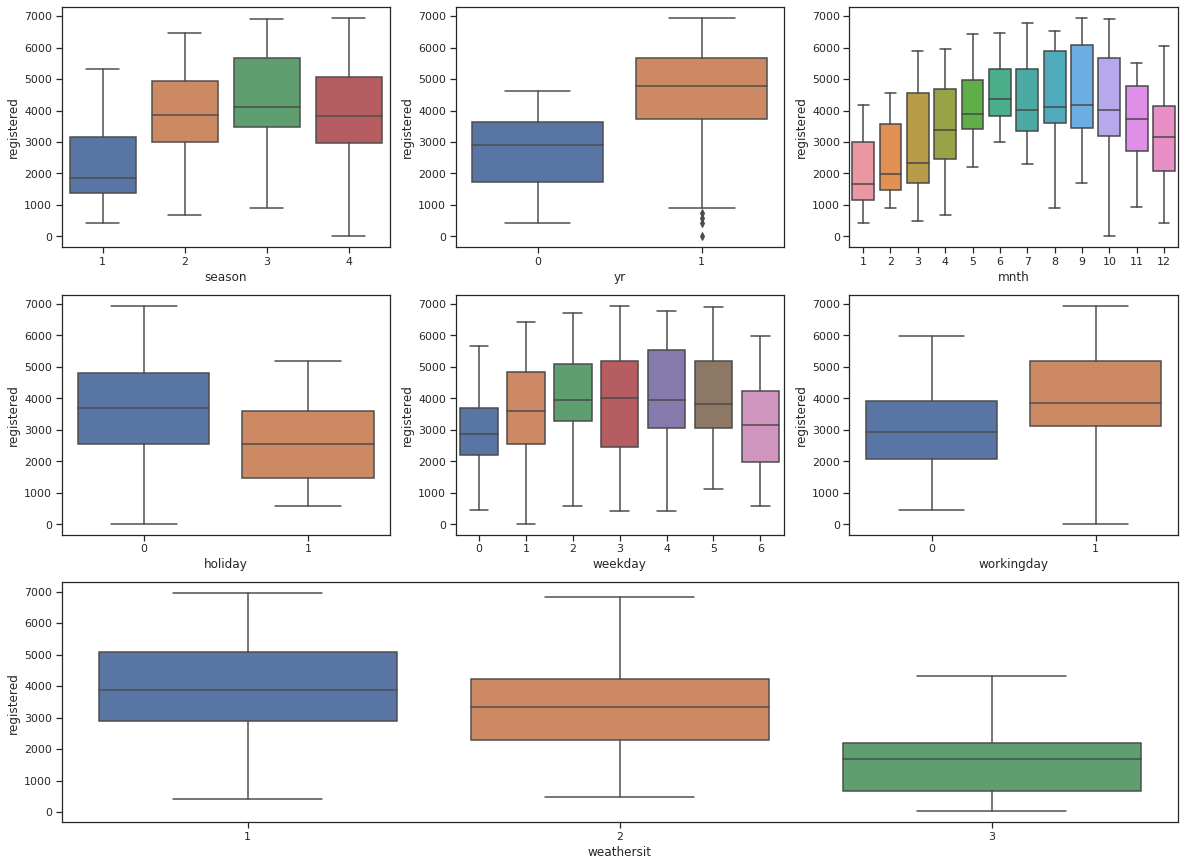

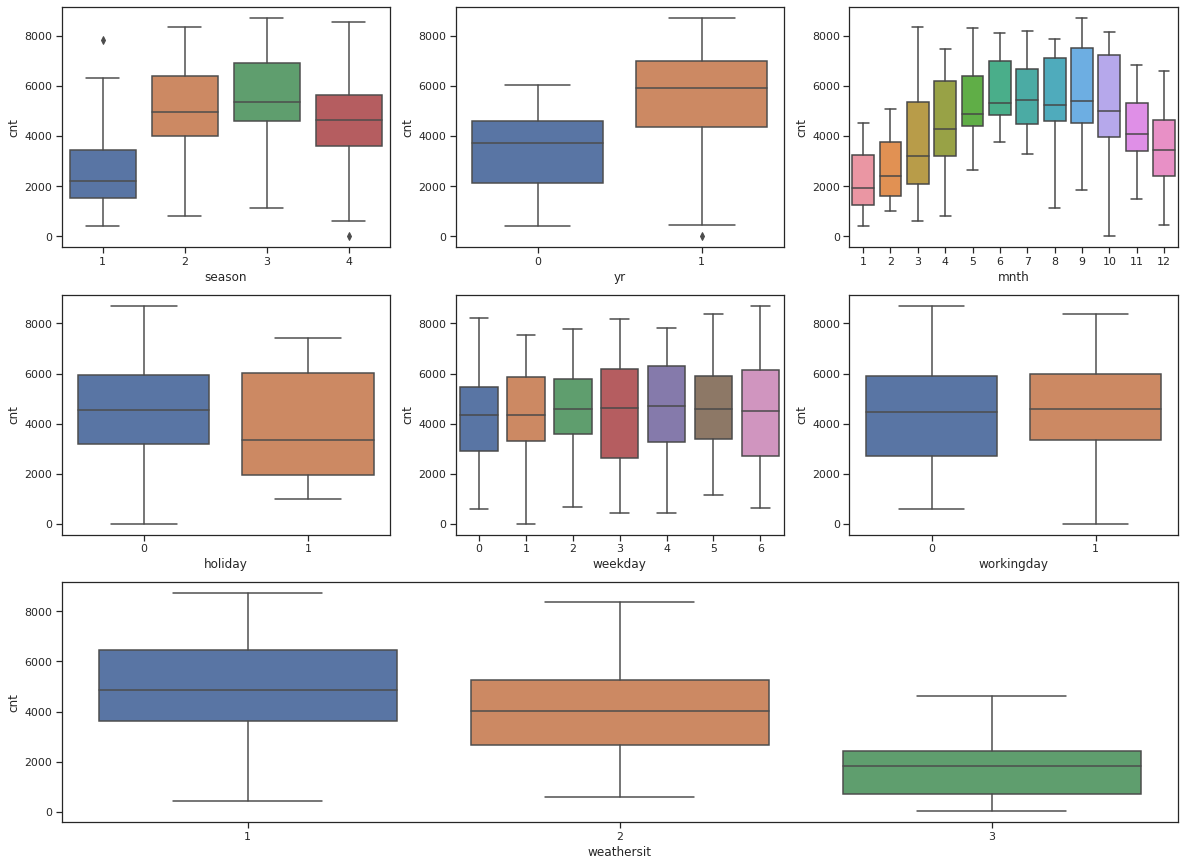

In [11]:
sns.set(style="ticks", color_codes=True)
C_feature = ['season','yr','mnth','holiday','weekday','workingday', 'weathersit']
num_feature = len(C_feature)
target_feature = ['casual','registered','cnt']
for target_name in target_feature:
  fig, axs = plt.subplots(3,3,figsize=(20,15))
  for i in range(num_feature-1):
    sns.boxplot(x=C_feature[i],y=target_name, data=bike_modified, ax=axs[i//3][i%3])
  ax=plt.subplot(3,1,3)
  sns.boxplot(x=C_feature[-1], y=target_name, data=bike_modified, ax=ax)
  plt.show()


For video dataset, categorical features are 'codec' and 'o_codec'

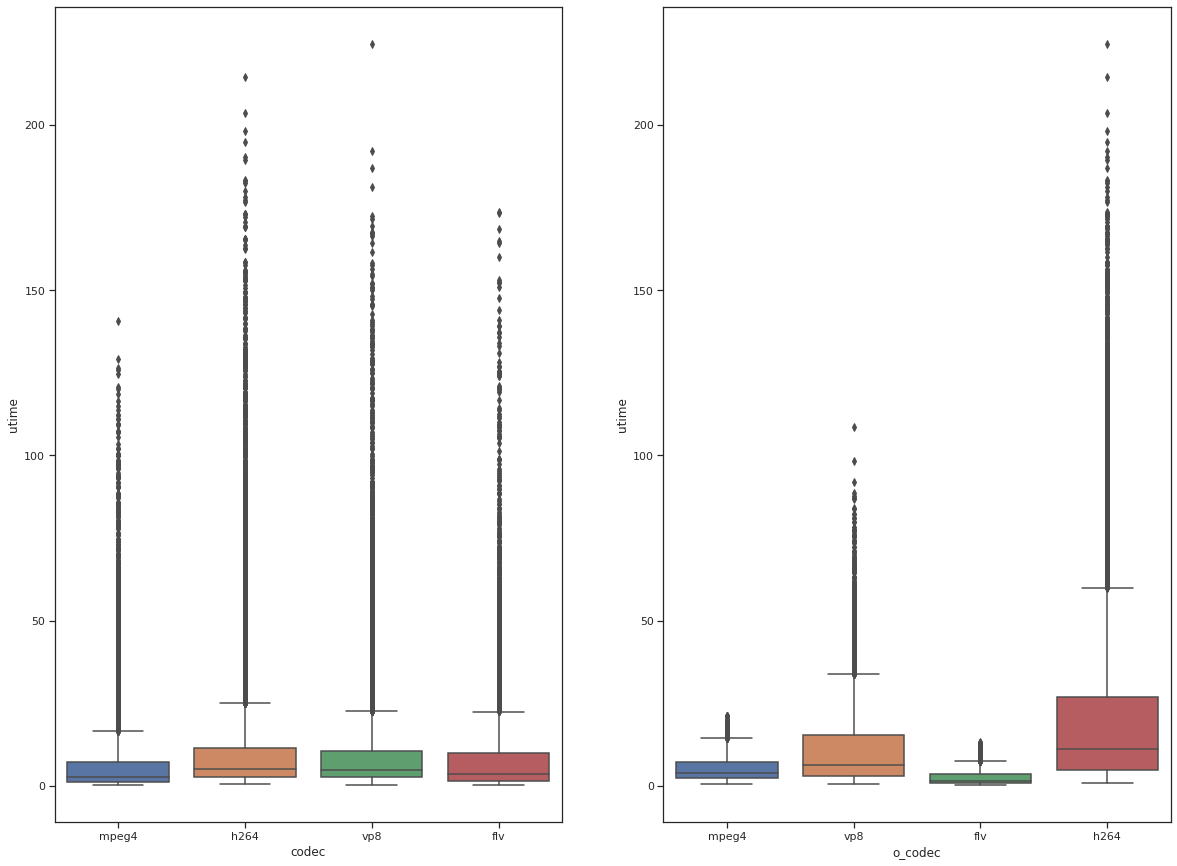

In [12]:
fig, axs = plt.subplots(1,2, figsize=(20, 15))
video_C_feature = ['codec','o_codec']
for i in range(len(video_C_feature)):
  sns.boxplot(x=video_C_feature[i], y='utime', data=coding,ax=axs[i])
plt.show()

# Question 4

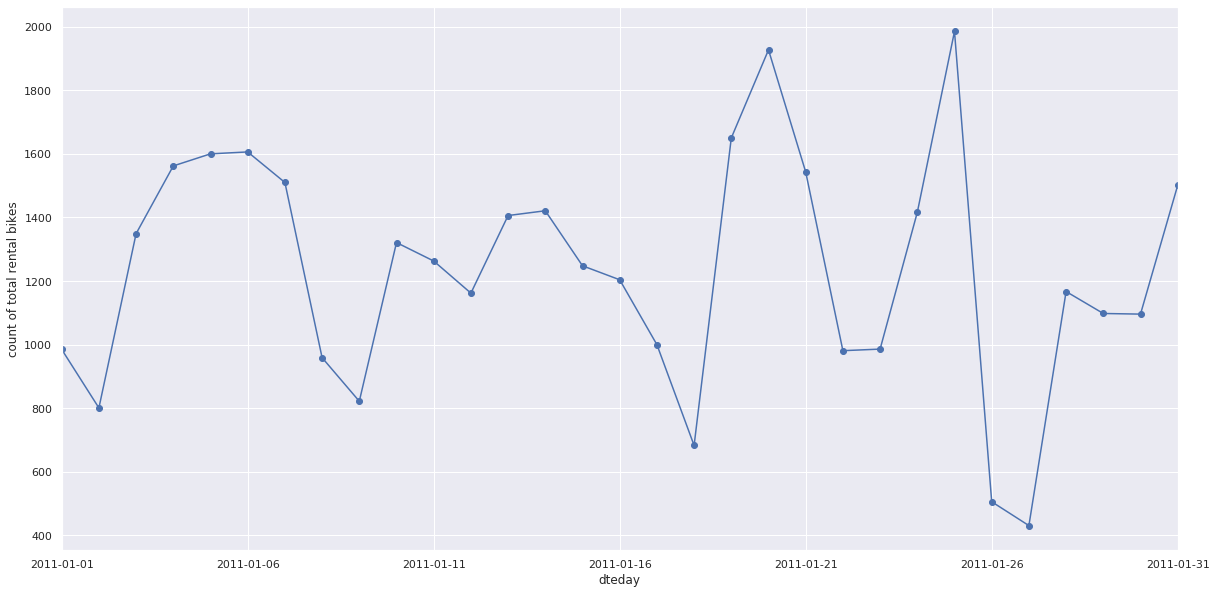

In [13]:
bike_timeseries = bike.set_index('dteday')
sns.set(rc={'figure.figsize':(20, 10)})
ax = bike_timeseries.loc['2011-01-01':'2011-01-31', 'cnt'].plot(marker='o', linestyle='-')
ax.set_ylabel('count of total rental bikes');

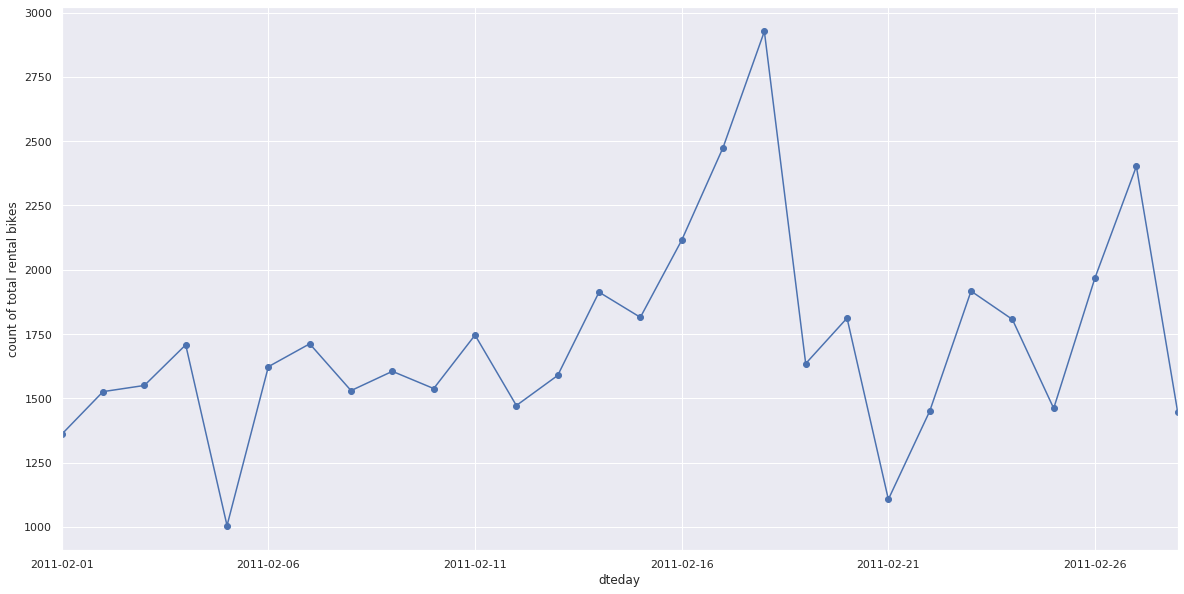

In [14]:
ax = bike_timeseries.loc['2011-02-01':'2011-02-28', 'cnt'].plot(marker='o', linestyle='-')
ax.set_ylabel('count of total rental bikes');

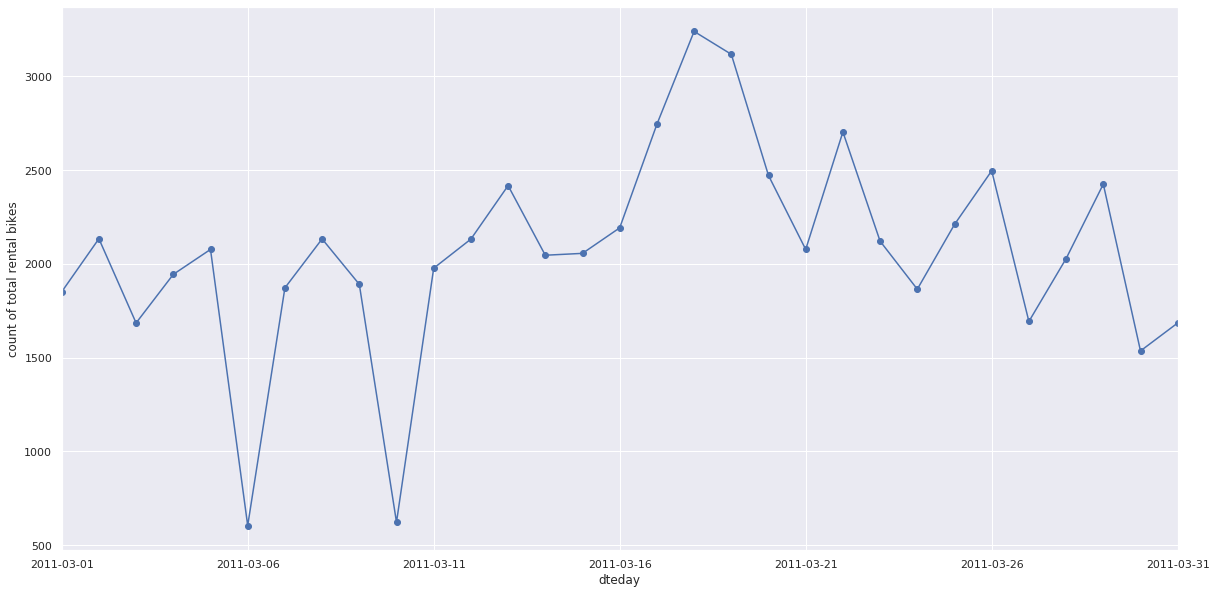

In [15]:
ax = bike_timeseries.loc['2011-03-01':'2011-03-31', 'cnt'].plot(marker='o', linestyle='-')
ax.set_ylabel('count of total rental bikes');

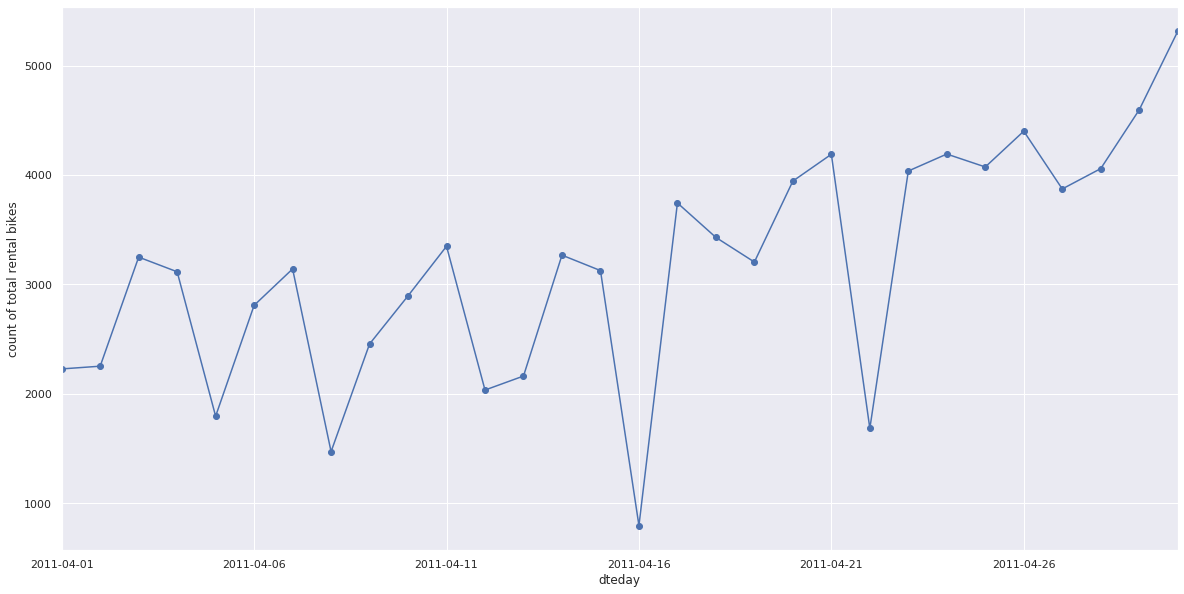

In [16]:
ax = bike_timeseries.loc['2011-04-01':'2011-04-30', 'cnt'].plot(marker='o', linestyle='-')
ax.set_ylabel('count of total rental bikes');

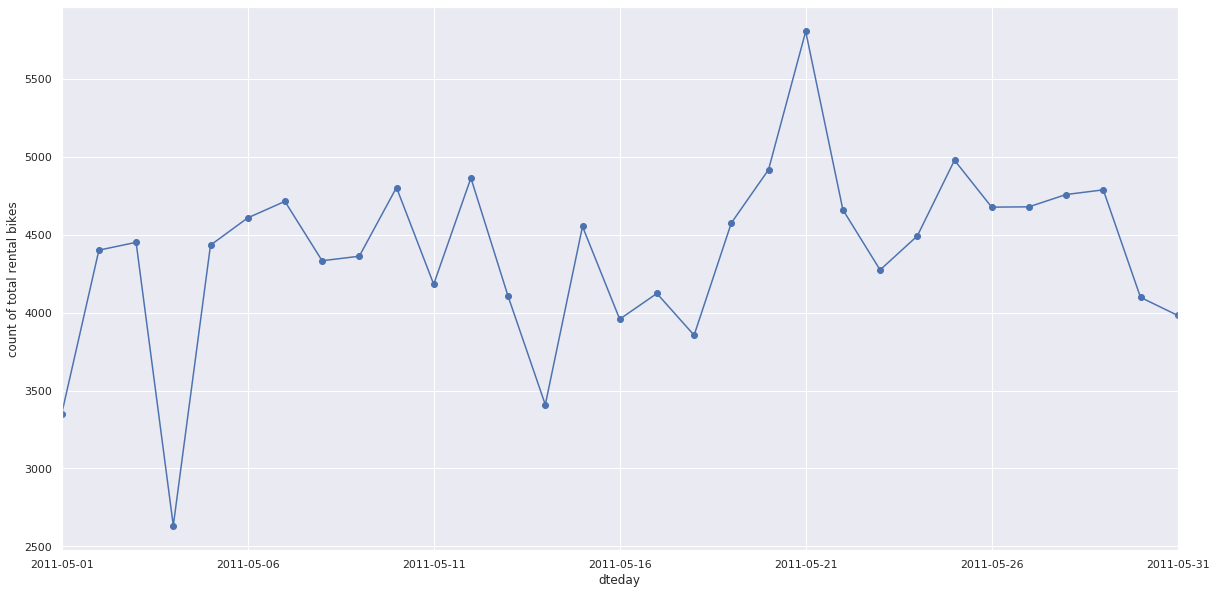

In [17]:
ax = bike_timeseries.loc['2011-05-01':'2011-05-31', 'cnt'].plot(marker='o', linestyle='-')
ax.set_ylabel('count of total rental bikes');

# Question 5

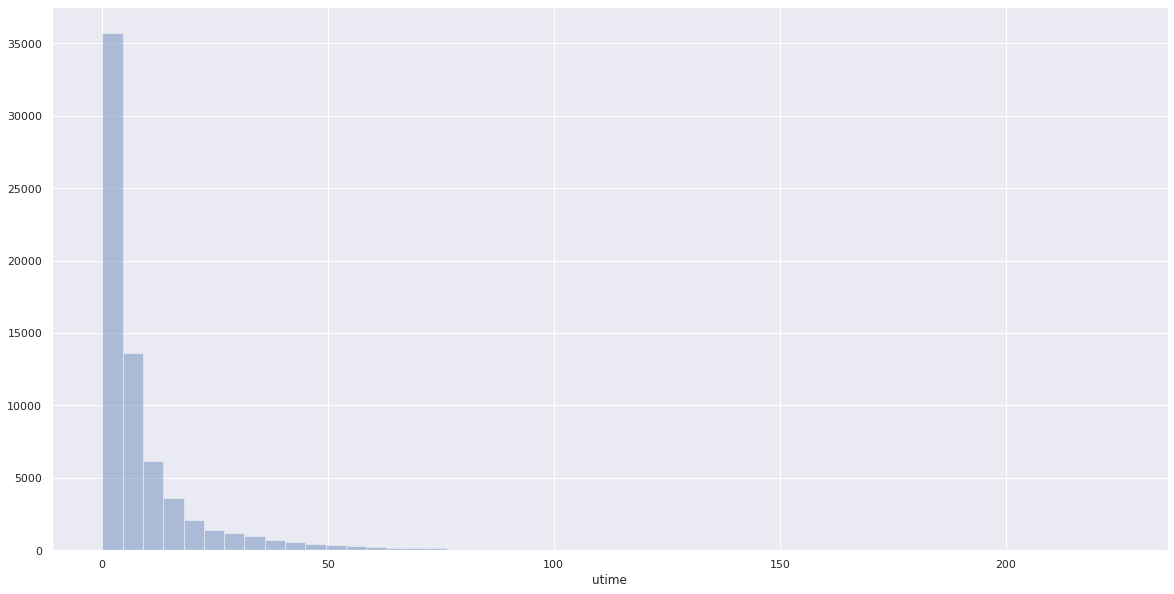

In [18]:
import statistics
x = coding_modified['utime']
sns.set(color_codes=True)
sns.distplot(x, kde=False, rug=False);

In [19]:
print('mean transcoding time is: ', statistics.mean(x))
print('median transcoding time is: ', statistics.median(x))

mean transcoding time is:  9.996354820888579
median transcoding time is:  4.408


# Question 6

For the video dataset, we will use 'one-hot' encoding to convert categorical variables into numbers.

In [0]:
bike_temp = bike_modified.copy()
bike_to_drop_2 = ['casual','registered']
bike_training = bike_temp.drop(bike_to_drop_2, axis=1)
coding_to_drop_2 = ['id','b_size']
temp = coding.drop(coding_to_drop_2, axis=1)
video_training = pd.get_dummies(temp, columns=['codec','o_codec'], drop_first=False)
bike_training = pd.get_dummies(bike_training, columns=['season','mnth','weekday'], drop_first=False)
b_feature_name = list(bike_training.columns)
v_feature_name = list(video_training.columns)

In [21]:
bike_training.head()


,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,2,0.344167,0.363625,0.805833,0.160446,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
video_training.head()
#video_training.info()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime,codec_flv,codec_h264,codec_mpeg4,codec_vp8,o_codec_flv,o_codec_h264,o_codec_mpeg4,o_codec_vp8
0,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,56000,12.0,176,144,22508,0.612,0,0,1,0,0,0,1,0
1,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,56000,12.0,320,240,25164,0.980,0,0,1,0,0,0,1,0
2,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,56000,12.0,480,360,29228,1.216,0,0,1,0,0,0,1,0
3,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,56000,12.0,640,480,34316,1.692,0,0,1,0,0,0,1,0
4,130.35667,176,144,54590,12.0,27,1537,0,1564,64483,825054,889537,56000,12.0,1280,720,58528,3.456,0,0,1,0,0,0,1,0


# Question 7

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


bike_target_column = 8
video_target_column = 17
bike_training = np.array(bike_training)
video_training = np.array(video_training)

'''
bike_standard = preprocessing.scale((np.array(bike_training)[:,0:11]),axis=0,with_mean=True,with_std=True,copy=True)
video_standard = preprocessing.scale((np.array(video_training)[:,0:26]),axis=0,with_mean=True,with_std=True,copy=True)
'''
b_scaler = StandardScaler()
v_scaler = StandardScaler()
bike_standard = b_scaler.fit_transform(bike_training)
video_standard = v_scaler.fit_transform(video_training)
print(np.array(video_standard)[0:4,:])

[[-0.54326973 -0.96927335 -1.11619663 -0.5833334  -1.55593617 -0.87145675
  -0.82205957 -0.09887915 -0.82520115 -0.64148815 -0.41895994 -0.44572942
  -0.76545262 -1.37821834 -1.02685605 -1.13880323 -2.11142727 -0.5826146
  -0.33229854 -0.92037807  2.17399948 -0.60402247 -0.5759849  -0.5747762
   1.725695   -0.57916331]
 [-0.54326973 -0.96927335 -1.11619663 -0.5833334  -1.55593617 -0.87145675
  -0.82205957 -0.09887915 -0.82520115 -0.64148815 -0.41895994 -0.44572942
  -0.76545262 -1.37821834 -0.7907732  -0.83497513 -2.08416672 -0.55976783
  -0.33229854 -0.92037807  2.17399948 -0.60402247 -0.5759849  -0.5747762
   1.725695   -0.57916331]
 [-0.54326973 -0.96927335 -1.11619663 -0.5833334  -1.55593617 -0.87145675
  -0.82205957 -0.09887915 -0.82520115 -0.64148815 -0.41895994 -0.44572942
  -0.76545262 -1.37821834 -0.52845893 -0.45519001 -2.04245479 -0.5451161
  -0.33229854 -0.92037807  2.17399948 -0.60402247 -0.5759849  -0.5747762
   1.725695   -0.57916331]
 [-0.54326973 -0.96927335 -1.1161966

# Question 8

In [26]:
bike_y = bike_training[:,bike_target_column]
bike_X = np.delete(bike_training, bike_target_column, axis=1)

video_y = video_training[:,video_target_column]
video_X = np.delete(video_training, video_target_column, axis=1)

'''
bike_y = bike_standard[:,bike_target_column]
bike_X = np.delete(bike_standard, bike_target_column, axis=1)

video_y = video_standard[:, video_target_column]
video_X = np.delete(video_standard, video_target_column, axis=1)
b_feature_name.pop(bike_target_column)
v_feature_name.pop(video_target_column)'''

'\nbike_y = bike_standard[:,bike_target_column]\nbike_X = np.delete(bike_standard, bike_target_column, axis=1)\n\nvideo_y = video_standard[:, video_target_column]\nvideo_X = np.delete(video_standard, video_target_column, axis=1)\nb_feature_name.pop(bike_target_column)\nv_feature_name.pop(video_target_column)'

19
22


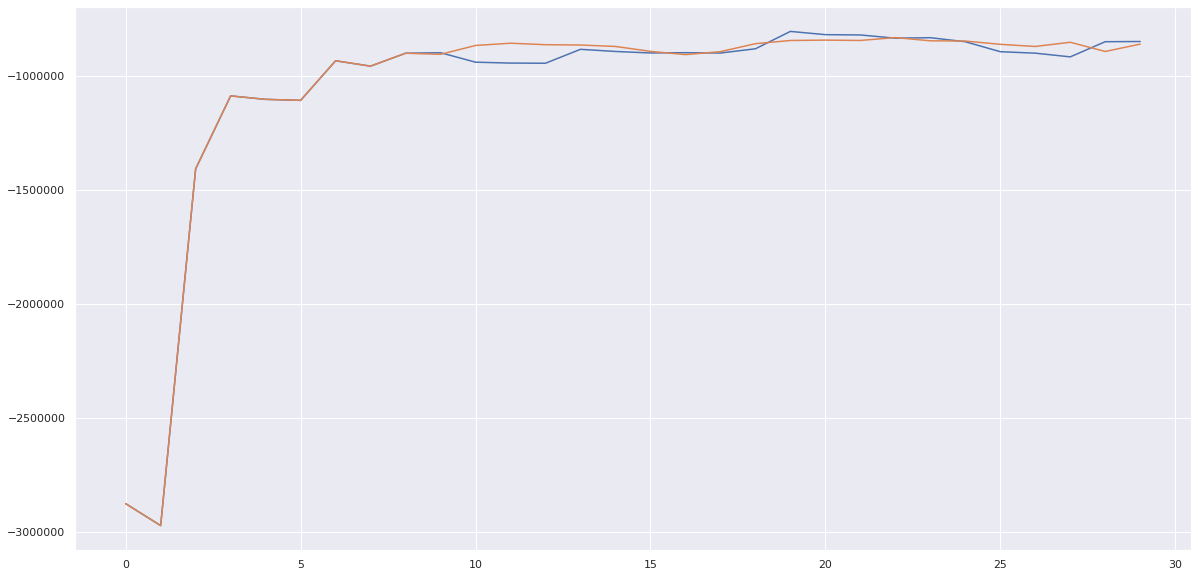

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.model_selection import cross_validate

l1b=[]
l2b=[]
for i in range(1,31):
  bike_mi_selected = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(bike_X, bike_y)
  cv_bike_mi = cross_validate(LinearRegression(), bike_mi_selected, bike_y, scoring=['neg_mean_squared_error'], cv=10)
  rmse_bike_mi = cv_bike_mi['test_neg_mean_squared_error']
  l1b.append(rmse_bike_mi.mean())
  bike_f_selected = SelectKBest(score_func=f_regression, k=i).fit_transform(bike_X, bike_y)
  cv_bike_f = cross_validate(LinearRegression(), bike_f_selected, bike_y, scoring=['neg_mean_squared_error'], cv=10)
  rmse_bike_f = cv_bike_f['test_neg_mean_squared_error']
  l2b.append(rmse_bike_f.mean())
plt.plot(l1b)
plt.plot(l2b)
print(l1b.index(max(l1b)))
print(l2b.index(max(l2b)))



10


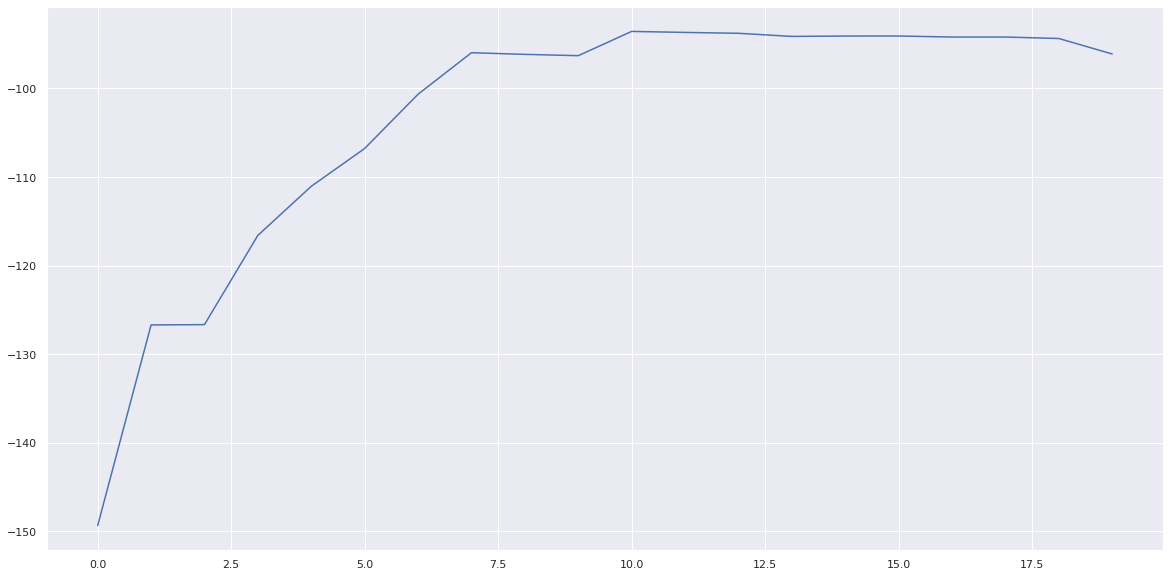

In [28]:
l1v=[]
l2v=[]
for i in range(1,21):
  video_f_selected = SelectKBest(score_func=f_regression, k=i).fit_transform(video_X, video_y)
  cv_video_f = cross_validate(LinearRegression(), video_f_selected, video_y, scoring=['neg_mean_squared_error'], cv=10)
  rmse_video_f = cv_video_f['test_neg_mean_squared_error']
  l2v.append(rmse_video_f.mean())

plt.plot(l2v)

print(l2v.index(max(l2v)))


In [29]:
(l1b+l2b)
l2b=[]
print((l1b+l2b).index(max((l1b+l2b))))

19


# Question 9-12

In [0]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

bike_sel = SelectKBest(score_func=f_regression, k=20).fit_transform(bike_X, bike_y)
video_sel = SelectKBest(score_func=f_regression, k=10).fit_transform(video_X, video_y)

In [31]:

 
bike_model_r = RidgeCV(alphas=[1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], normalize=False)
bike_model_r.fit(bike_sel, bike_y)
print("best alpha for Ridge in bike model is")
print(bike_model_r.alpha_)
bike_model_l = LassoCV(alphas=[1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], normalize=False)
bike_model_l.fit(bike_sel, bike_y)
print("best alpha for Lasso in bike model is")
print(bike_model_l.alpha_)

bike_lr = LinearRegression().fit(bike_sel, bike_y)
print("score for Linear Regression in bike model is")
print(bike_lr.score(bike_sel, bike_y))

bike_ridge = Ridge(alpha = bike_model_r.alpha_).fit(bike_sel, bike_y)
print("score for Ridge in bike model is")
print(bike_ridge.score(bike_sel, bike_y))

bike_lasso = Lasso(alpha = bike_model_l.alpha_).fit(bike_sel, bike_y)
print("score for Lasso in bike model is")
print(bike_lasso.score(bike_sel, bike_y))

video_model_r = RidgeCV(alphas=[1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], normalize=False)
video_model_r.fit(video_sel, video_y)
print("best alpha for Ridge in video model is")
print(video_model_r.alpha_)
video_model_l = LassoCV(alphas=[1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], normalize=False)
video_model_l.fit(video_sel, video_y)
print("best alpha for Lasso in video model is")
print(video_model_l.alpha_)

video_lr = LinearRegression().fit(video_sel, video_y)
print("score for Linear Regression in video model is")
print(video_lr.score(video_sel, video_y))

video_ridge = Ridge(alpha = video_model_r.alpha_).fit(video_sel, video_y)
print("score for Ridge in video model is")
print(video_ridge.score(video_sel, video_y))

video_lasso = Lasso(alpha = video_model_l.alpha_).fit(video_sel, video_y)
print("score for Lasso in video model is")
print(video_lasso.score(video_sel, video_y))


best alpha for Ridge in bike model is
0.5
best alpha for Lasso in bike model is
1.0
score for Linear Regression in bike model is
0.836059224645085
score for Ridge in bike model is
0.8356307206015167
score for Lasso in bike model is
0.8358379241657808
best alpha for Ridge in video model is
1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818251.7442547083, tolerance: 187538.32612649575
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411374.6437074235, tolerance: 1784.569817170224
  positive)


best alpha for Lasso in video model is
0.0001
score for Linear Regression in video model is
0.6406797757621716
score for Ridge in video model is
0.6406797749486274
score for Lasso in video model is
0.6406797750904079


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411374.6437074235, tolerance: 1784.569817170224
  positive)


# Question 13, 14

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression

from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory

cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)
reg_tuple = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
degree_tuple = [2, 3, 5, 10]
pipeline = Pipeline([
    ('selection', SelectKBest()),
    ('poly', PolynomialFeatures(degree=2)),
    ('clf',LinearRegression()),
],
    memory=memory
)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/tmp/tmplhi__r4c'", use "location='/tmp/tmplhi__r4c'" instead.
  if sys.path[0] == '':


In [0]:
bk_tuple= np.arange(1, bike_X.shape[1]+1, 3)
vk_tuple = np.arange(1, video_X.shape[1]+1, 4)
bp_param_grid = [
     {
        'selection': [SelectKBest(score_func=f_regression), SelectKBest(score_func=mutual_info_regression)],
        'selection__k': bk_tuple,
        'clf': [Lasso(alpha=0.001, max_iter=1e4)],
    }
]

bp_grid = GridSearchCV(pipeline, bp_param_grid, scoring ='neg_mean_squared_error', n_jobs=-1)
bp_grid.fit(bike_X, bike_y)
rmtree(cachedir)


In [0]:
vp_param_grid = [
     {
        'selection': [SelectKBest(score_func=f_regression)],
        'selection__k': vk_tuple,
        'clf': [Lasso(alpha=0.001, max_iter=1e4)],
    }
]
vp_grid = GridSearchCV(pipeline, vp_param_grid, scoring ='neg_mean_squared_error')
vp_grid.fit(video_X, video_y)
rmtree(cachedir)

In [0]:
degree_tuple = [2, 3, 4, 5]
bd_param_grid = [
     {
        'selection':[bp_grid.best_params_['selection']],
        'poly__degree': degree_tuple,
        'clf': [Lasso(alpha=0.001, max_iter=1e4)],
    }
]
vd_param_grid = [
     {
        'selection':[vp_grid.best_params_['selection']],
        'poly__degree': degree_tuple[:2],
        'clf': [Lasso(alpha=0.001)],
    }
]

bd_grid = GridSearchCV(pipeline, bd_param_grid, scoring ='neg_mean_squared_error')
bd_grid.fit(bike_X, bike_y)
rmtree(cachedir)

vd_grid = GridSearchCV(pipeline, vd_param_grid, scoring ='neg_mean_squared_error')
vd_grid.fit(video_X, video_y)
rmtree(cachedir)

In [0]:
reg_tuple = [1e-5, 1e-3, 1e-2, 1e-1, 1]
br_param_grid = [
     {
        'selection':[bp_grid.best_params_['selection']],
        'poly__degree': [bd_grid.best_params_['poly__degree']],
        'clf': [Lasso(), Ridge()],
        'clf__alpha': reg_tuple
    }
]
vr_param_grid = [
     {
        'selection':[vp_grid.best_params_['selection']],
        'poly__degree': [vd_grid.best_params_['poly__degree']],
        'clf': [Lasso(), Ridge()],
        'clf__alpha': reg_tuple
    }
]

br_grid = GridSearchCV(pipeline, br_param_grid, scoring ='neg_mean_squared_error')
br_grid.fit(bike_X, bike_y)
rmtree(cachedir)

vr_grid = GridSearchCV(pipeline, vr_param_grid, scoring ='neg_mean_squared_error')
vr_grid.fit(video_X, video_y)
rmtree(cachedir)

In [0]:
br_grid.best_estimator_.fit(bike_X, bike_y)
b_params = br_grid.best_estimator_.get_params()
b_coefs = b_params['clf'].coef_
select_name = [b_feature_name[i] for i in b_params['selection'].get_support(indices=True)]
b_sorted_indice = np.argsort(-abs(b_coefs))
b_names = b_params['poly'].get_feature_names(select_name)
salient_feature =[b_names[i] for i in b_sorted_indice[:5]]
print (salient_feature)

In [0]:
vr_grid.best_estimator_.fit(video_X, video_y)
v_params = vr_grid.best_estimator_.get_params()
v_coefs = v_params['clf'].coef_
select_name = [v_feature_name[i] for i in v_params['selection'].get_support(indices=True)]
v_sorted_indice = np.argsort(-abs(v_coefs))
v_names = v_params['poly'].get_feature_names(select_name)
salient_feature =[v_names[i] for i in v_sorted_indice[:5]]
print (salient_feature)

#Question 15


In [0]:
from sklearn.model_selection import cross_val_score

crafted_feature = 1 / video_training[:, 12]
crafted_video = np.concatenate((video_training, crafted_feature[:, None]), axis=1)
v_scaler = StandardScaler()
crafted_v_standard = v_scaler.fit_transform(crafted_video)
cv_y = crafted_v_standard[:, video_target_column]
cv_X = np.delete(crafted_v_standard, video_target_column, axis=1)

In [0]:
value = [0, 0]
pipeline = Pipeline([
    ('select', SelectKBest(f_regression, k=13)),
    ('Poly', PolynomialFeatures(degree=3)),
    ('Regressor', Lasso(alpha=0.01, normalize=False))
],
    memory=memory
)

value[0] = cross_val_score(pipeline, cv_X, cv_y, scoring='neg_mean_squared_error').mean()
value[1] = cross_val_score(pipeline, video_X, video_y, scoring='neg_mean_squared_error').mean()
print(value)

# Question 17

In [0]:
from sklearn.neural_network import MLPRegressor

NN_pipeline = Pipeline([
    ('Regressor', MLPRegressor(max_iter=1000))
],
    memory=memory
)

depths = [1, 2, 3, 5]
unit_tuple = [30, 40, 50]
combination = []
for d in depths:
    for num_units in unit_tuple:
        combination.append(tuple([num_units]) * d)

activation_f = ['identity', 'logistic', 'tanh', 'relu']
param_grid = [
    {
        'Regressor__hidden_layer_sizes': combination,
        'Regressor__activation': activation_f
    }
]
b_grid = GridSearchCV(NN_pipeline, n_jobs=-1, param_grid=param_grid, scoring='r2')

b_grid.fit(bike_X, bike_y)
rmtree(cachedir)
bike_MLP_result = pd.DataFrame(b_grid.cv_results_)
bike_MLP_result.to_excel('bike_MLP_result.xls')

In [0]:
v_grid = GridSearchCV(NN_pipeline, n_jobs=-1, param_grid=param_grid, scoring='r2')

v_grid.fit(video_X, video_y)
rmtree(cachedir)
video_MLP_result = pd.DataFrame(v_grid.cv_results_)
video_MLP_result.to_excel('video_MLP_result.xls')

In [0]:
from google.colab import files
files.download('bike_MLP_result.xls')
files.download('video_MLP_resulg.xls')

#Question 20

In [0]:
from sklearn import ensemble
grid = {'n_estimators':list(np.arange(10, 101, 5)), 'max_depth':list(np.arange(4, 20, 1)), 'max_features':list(np.arange(3, 12, 3))}
random_forest = ensemble.RandomForestRegressor()
rf_b = GridSearchCV(estimator=random_forest, param_grid=grid, cv=10)
rf_b.fit(bike_X, bike_y)
rf_b.best_estimator_

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
def kfold_validation(model, x, y):
    train_rmse = 0.0
    val_rmse = 0.0
    kf = KFold(n_splits=10)
    for train_i, val_i in kf.split(x):
        model.fit(x[train_i], y[train_i])
        train_pred = model.predict(x[train_i])
        val_pred = model.predict(x[val_i])
        train_rmse += np.sqrt(metrics.mean_squared_error(train_pred, y[train_i]))/10
        val_rmse += np.sqrt(metrics.mean_squared_error(val_pred, y[val_i]))/10
    print ('Training RMSE:{}'.format(train_rmse))
    print ('Validation RMSE:{}'.format(val_rmse))

In [0]:
random_forest_mlp = ensemble.RandomForestRegressor(max_depth=14, max_features=9, n_estimators=50, oob_score=True)
kfold_validation(random_forest_mlp, bike_X, bike_y)
print ('OOB Score is:{}'.format(random_forest_mlp.oob_score_))

In [0]:
rf_b.fit(video_X, video_y)
rf_b.best_estimator_

In [0]:
random_forest_mlp = ensemble.RandomForestRegressor(max_depth=14, max_features=9, n_estimators=50, oob_score=True)
kfold_validation(random_forest_mlp, video_X, video_y)
print ('OOB Score is:{}'.format(random_forest_mlp.oob_score_)

In [0]:
import os
from sklearn import tree
import graphviz 
from subprocess import call
from sklearn.tree import export_graphviz
from IPython.display import Image

random_forest = ensemble.RandomForestRegressor(n_estimators=50, max_features=9, max_depth = 4, oob_score=True)

random_forest.fit(bike_X, bike_y)


export_graphviz(random_forest.estimators_[0], filled=True, rounded=True, out_file="tree.dot")
os.system('dot -Tpng tree.dot -o'+'_tree.png')